In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data = pd.read_csv(url, skiprows=1)

In [8]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [9]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [11]:
sorted_data = data.set_index('period').sort_index()

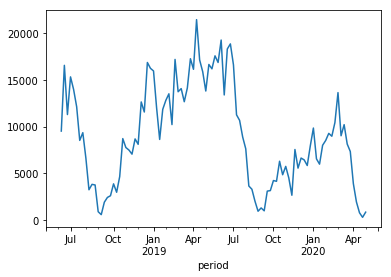

In [14]:
sorted_data['inc'][-100:].plot()

In [21]:
weeks = [pd.Period(pd.Timestamp(y, 9, 1), 'W') for y in range(1991, sorted_data.index[-1].year)]

In [23]:
x = []
y = []
for week1, week2 in zip(weeks[:-1],
                        weeks[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    print(len(one_year))
    
    x.append(week2.year)
    y.append(one_year.sum())
    
serie = pd.Series(index=x, data=y)

53
52
52
52
52
53
52
52
52
52
52
53
52
52
52
52
53
52
52
52
52
52
53
52
52
52
52
52


In [24]:
serie.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64